In [1]:
#import datas

import pandas as pd
import numpy as np
all_data = pd.DataFrame()
df = pd.read_csv('./TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
all_data = all_data.append(df, ignore_index=True)

df = pd.read_csv('./TrafficLabelling/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
all_data = all_data.append(df, ignore_index=True)

df = pd.read_csv('./TrafficLabelling/Friday-WorkingHours-Morning.pcap_ISCX.csv')
all_data = all_data.append(df, ignore_index=True)

df = pd.read_csv('./TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv')
all_data = all_data.append(df, ignore_index=True)

df = pd.read_csv('./TrafficLabelling/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
all_data = all_data.append(df, ignore_index=True)

# df = pd.read_csv('./TrafficLabelling/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
# all_data = all_data.append(df, ignore_index=True)

df = pd.read_csv('./TrafficLabelling/Tuesday-WorkingHours.pcap_ISCX.csv')
all_data = all_data.append(df, ignore_index=True)

df = pd.read_csv('./TrafficLabelling/Wednesday-workingHours.pcap_ISCX.csv')
all_data = all_data.append(df, ignore_index=True)

print(all_data.shape)

# print(df.describe())
# print(df)
headers = list(df.columns)
print(headers)

(2660377, 85)
['Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN

In [2]:
#select a subset of columns
# df = pd.DataFrame(df, columns=['Source Port', 'Source Port', 'Destination IP', 'Destination Port', 'Label'])
# print(df.head())

In [3]:
headers = headers[7:]
headers = np.delete(headers, [13, 14, -1], 0)
X = all_data.iloc[:, 7:-1].values
y = all_data.iloc[:, -1].values
X = np.delete(X, [13, 14], 1)
# print(X)
# print(y[0])

In [4]:
# print(y[0] == 'BENIGN')
# for i in range(y.shape[0]):
#     if y[i] == 'BENIGN':
#         y[i] = 1
#     else:
#         y[i] = 0
# count = 0
# for i in range(y.shape[0]):
#     if y[i] == 1:
#         count +=1
# print(count)

y = np.where(y == 'BENIGN', 0, 1)
# print(newY)
# count = 0
# for i in newY:
#     if newY[i] == 1:
#         count +=1
# print(count)

In [5]:
# print(newY)
# count = 0
# for i in range(newY.shape[0]):
#     if newY[i] == 0:
#         count +=1
# print(count)
# print(y.shape)

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X=X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [7]:
# print(np.all(np.isfinite(X))) #and gets False
# for i in range(X.shape[0]):
#     for j in range(X.shape[1]): 
#         if not np.isfinite(X[i][j]):
#             print(i, j, X[i][j])
# np.isfinite(X).all()
# np.argwhere(np.isnan(X))

True


KeyboardInterrupt: 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
classifier = SelectFromModel(RandomForestClassifier(n_estimators = 100, criterion = 'entropy'))
classifier.fit(X_train, y_train)
boolfeature = classifier.get_support()

In [11]:
selected_feat= headers[(classifier.get_support())]
print(selected_feat)
print(len(selected_feat))

[' Total Fwd Packets' ' Total Backward Packets'
 'Total Length of Fwd Packets' ' Total Length of Bwd Packets'
 ' Fwd Packet Length Max' 'Bwd Packet Length Max' ' Bwd Packet Length Min'
 ' Bwd Packet Length Mean' ' Bwd Packet Length Std' ' Fwd Header Length'
 ' Bwd Header Length' ' Min Packet Length' ' Max Packet Length'
 ' Packet Length Mean' ' Packet Length Std' ' Packet Length Variance'
 ' Average Packet Size' ' Avg Fwd Segment Size' ' Avg Bwd Segment Size'
 ' Fwd Header Length.1' 'Subflow Fwd Packets' ' Subflow Fwd Bytes'
 ' Subflow Bwd Bytes' 'Init_Win_bytes_forward' ' Init_Win_bytes_backward'
 ' min_seg_size_forward']
26


In [12]:
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

Feature: 0, Score: 0.00730
Feature: 1, Score: 0.00945
Feature: 2, Score: 0.01029
Feature: 3, Score: 0.02236
Feature: 4, Score: 0.03415
Feature: 5, Score: 0.01918
Feature: 6, Score: 0.01687
Feature: 7, Score: 0.00811
Feature: 8, Score: 0.00684
Feature: 9, Score: 0.02840
Feature: 10, Score: 0.01978
Feature: 11, Score: 0.04094
Feature: 12, Score: 0.04850
Feature: 13, Score: 0.00828
Feature: 14, Score: 0.00809
Feature: 15, Score: 0.01116
Feature: 16, Score: 0.00582
Feature: 17, Score: 0.00536
Feature: 18, Score: 0.00719
Feature: 19, Score: 0.01024
Feature: 20, Score: 0.00968
Feature: 21, Score: 0.00885
Feature: 22, Score: 0.00167
Feature: 23, Score: 0.00199
Feature: 24, Score: 0.00142
Feature: 25, Score: 0.00241
Feature: 26, Score: 0.00613
Feature: 27, Score: 0.00048
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00002
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.02324
Feature: 32, Score: 0.02347
Feature: 33, Score: 0.00543
Feature: 34, Score: 0.01091
Feature: 35, Score: 0.01050
Fe

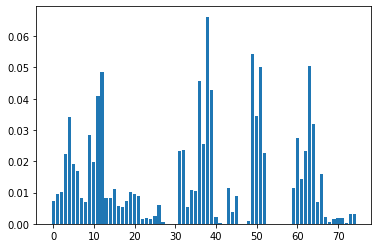

In [13]:
# summarize feature importance
import matplotlib.pyplot as plt
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [14]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[420871    377]
 [   285 110543]]


0.998755816838196

In [4]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

NameError: name 'y_test' is not defined

In [16]:
headers = np.delete(headers, ~boolfeature, 0)
X = np.delete(X, ~boolfeature, 1)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)
classifier = SelectFromModel(RandomForestClassifier(n_estimators = 100, criterion = 'entropy'))
classifier.fit(X_train, y_train)
classifier.get_support()
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
selected_feat= headers[(classifier.get_support())]
print(selected_feat)
print(len(selected_feat))